<a href="https://colab.research.google.com/github/iMan0405/Data_Science_Cert/blob/main/Pnevmoniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pnevmoniya ni aniqlash

### Ushbu loyihada rasmlar bilan tahlil qilinganligi sababli, tezroq ishlashi uchun CPU dan GPU ga olib o'tishimiz zarur

In [22]:
import torch
torch.cuda.is_available()

True

In [23]:
import fastai
print(f"torch versiyasi: {torch.__version__}")
print(f"fastai versiyasi: {fastai.__version__}")

torch versiyasi: 2.0.1+cu118
fastai versiyasi: 2.7.12


### Kutubxonlarni yuklab olamiz

In [24]:
from fastai.vision.all import *
from ipywidgets import widgets

### path o'zgaruvchi yaratib datasetimizni saqlab olamiz

In [25]:
train = Path('/content/drive/MyDrive/train')
test = Path('/content/drive/MyDrive/test')
sample_solution = pd.read_csv('/content/drive/MyDrive/sample_solution.csv')

### Ma'lumotlarni tahlil qilamiz

In [26]:
sample_solution.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [27]:
sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      624 non-null    object
 1   labels  624 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.9+ KB


In [28]:
test.ls()

(#624) [Path('/content/drive/MyDrive/test/test_img_10066.jpeg'),Path('/content/drive/MyDrive/test/test_img_10001.jpeg'),Path('/content/drive/MyDrive/test/test_img_10065.jpeg'),Path('/content/drive/MyDrive/test/test_img_10064.jpeg'),Path('/content/drive/MyDrive/test/test_img_10038.jpeg'),Path('/content/drive/MyDrive/test/test_img_10012.jpeg'),Path('/content/drive/MyDrive/test/test_img_10063.jpeg'),Path('/content/drive/MyDrive/test/test_img_10026.jpeg'),Path('/content/drive/MyDrive/test/test_img_10047.jpeg'),Path('/content/drive/MyDrive/test/test_img_10060.jpeg')...]

In [29]:
train.ls()
fls = get_image_files(train)
fls

(#5216) [Path('/content/drive/MyDrive/train/NORMAL/IM-0511-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0525-0001-0002.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0509-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0517-0001-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0510-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0526-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0520-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0519-0001-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0531-0001-0001.jpeg'),Path('/content/drive/MyDrive/train/NORMAL/IM-0545-0001-0002.jpeg')...]

### yuklab olingan file larda xatoli bor yo'qligini tkshiramiz

In [30]:
failed = verify_images(train)
failed

'PosixPath' object is not iterable


(#0) []

### data loader yaratib olamiz

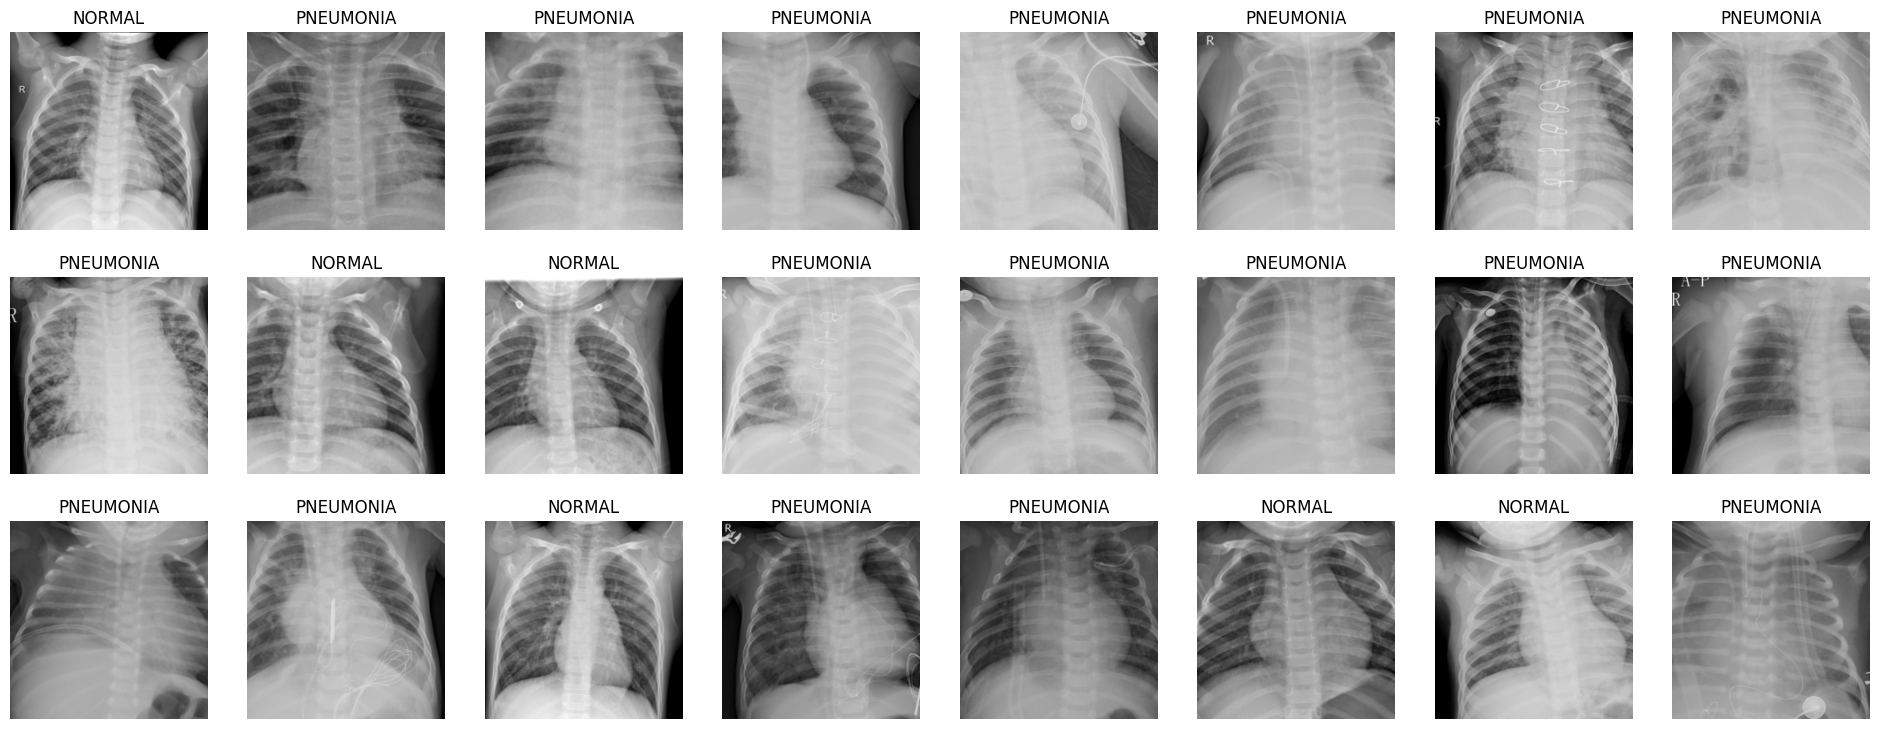

In [31]:
#DataBlock yaratamiz
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz
dls = transports.dataloaders(train)

#Datasetni tekshirish
dls.train.show_batch(max_n=24, nrows=3)

# Machine Learning

In [33]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.461458,0.209264,0.937680,02:01


epoch,train_loss,valid_loss,accuracy,time
0,0.159494,0.066404,0.973154,02:02
1,0.115984,0.097905,0.974113,01:59
2,0.074496,0.079814,0.982742,01:59
3,0.063486,0.073229,0.984660,02:01
4,0.037780,0.054326,0.982742,01:59
5,0.019307,0.055226,0.988495,01:59
6,0.012417,0.056620,0.988495,01:59
7,0.008788,0.051492,0.988495,02:03


### Xatoliklarni tekshirish

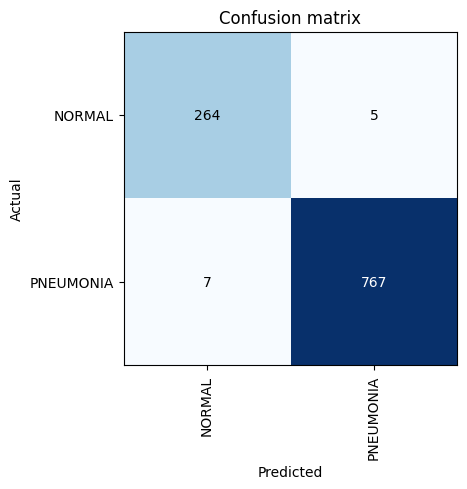

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

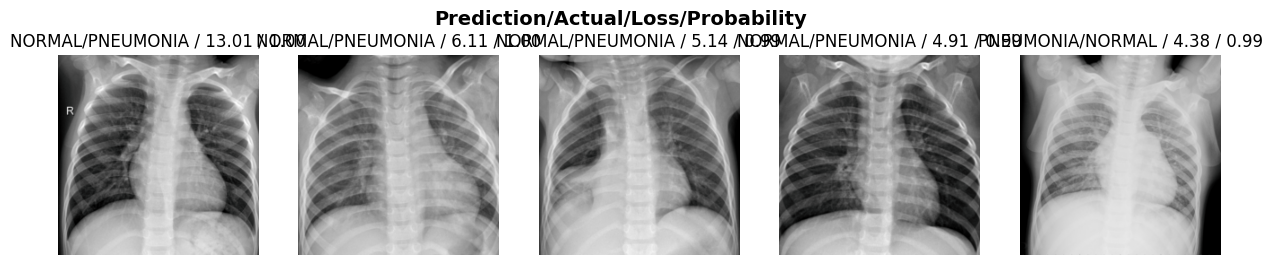

In [35]:
interp.plot_top_losses(5, nrows=1)

# Test data ni predict qilamiz va solution ga natijalarni saqlab olamiz

In [36]:
for i in range(len(sample_solution)):
  label = sample_solution.iloc[i, 0]
  img = PILImage.create(Path(f'/content/drive/MyDrive/test/{label}'))
  pred, pred_id, probs = learn.predict(img)
  sample_solution.iloc[i, 1] = pred

### sulotion faylini tekshirib ko'ramiz va ba'zi o'zgartirishlarni kiritamiz

In [37]:
sample_solution.head()

,id,labels
0,test_img_10001.jpeg,PNEUMONIA
1,test_img_10002.jpeg,NORMAL
2,test_img_10003.jpeg,PNEUMONIA
3,test_img_10004.jpeg,PNEUMONIA
4,test_img_10005.jpeg,NORMAL


In [38]:
sample_solution['labels'] = sample_solution['labels'].replace({'PNEUMONIA':'positive', 'NORMAL':'negative'})
sample_solution

,id,labels
0,test_img_10001.jpeg,positive
1,test_img_10002.jpeg,negative
2,test_img_10003.jpeg,positive
3,test_img_10004.jpeg,positive
4,test_img_10005.jpeg,negative
...,...,...
619,test_img_10620.jpeg,positive
620,test_img_10621.jpeg,negative
621,test_img_10622.jpeg,positive
622,test_img_10623.jpeg,positive


### Modelni saqlab olamiz

In [39]:
learn.export('Pnevmoniya_model.pkl')